In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import splprep, splrep, splev, UnivariateSpline, LSQUnivariateSpline, CubicSpline, BSpline, InterpolatedUnivariateSpline, make_interp_spline, make_lsq_spline

In [82]:
#[-0.52, 0.52]
x_old = np.array([73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108
,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,
145,146,147,148,149])
y_old = np.array([128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,129,129,129,130,130,131,131,132,133,133,134,134,135,135,136,137,137,138,138,139,139,140,141,141,142,142,143,143,144,145,145,146,146,147,147,148,149,149])


In [83]:
print(len(x_old))
print(len(y_old))

77
77


In [84]:
points = np.c_[x_old,y_old]    
final_ordered = np.flip(points, 0)

In [85]:
#st_pt = final_ordered[0]
#end_pt = final_ordered[-1]
#final_ordered = np.linspace(st_pt, end_pt, 5)
#x = final_ordered[:,0]
#y = final_ordered[:,1]
#print(x)
#print(y)
#order = np.argsort(x)
#xsort, ysort = x[order], y[order]

xsort = np.sort(x_old)
ysort = np.sort(y_old)

In [86]:
spl = splrep(xsort,ysort)
#print(tck)
#xsort = np.line
print(spl)

(array([ 73.,  73.,  73.,  73.,  75.,  76.,  77.,  78.,  79.,  80.,  81.,
        82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,
        93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101., 102., 103.,
       104., 105., 106., 107., 108., 109., 110., 111., 112., 113., 114.,
       115., 116., 117., 118., 119., 120., 121., 122., 123., 124., 125.,
       126., 127., 128., 129., 130., 131., 132., 133., 134., 135., 136.,
       137., 138., 139., 140., 141., 142., 143., 144., 145., 146., 147.,
       149., 149., 149., 149.]), array([128.        , 128.        , 128.        , 128.        ,
       128.        , 128.        , 128.        , 128.        ,
       128.        , 128.        , 128.        , 128.        ,
       128.        , 128.        , 128.        , 128.        ,
       128.        , 128.        , 128.        , 128.        ,
       128.        , 128.        , 128.        , 128.        ,
       128.        , 128.00000001, 127.99999995, 128.00000018,
       127.999

In [87]:
print(spl[0])

[ 73.  73.  73.  73.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 149. 149. 149. 149.]


In [94]:
#t = spl[0]

#spline = make_lsq_spline(xsort, ysort, t, k=3)

spl = UnivariateSpline(xsort, ysort)

t - spl.get_knots()

spline = LSQUnivariateSpline(xsort, ysort, t[1:-1], k=3)

print(spline.c)

ValueError: operands could not be broadcast together with shapes (81,) (2,) 

In [70]:
t = [0, 1, 2, 3, 4, 5, 6, 7, 8]
c = [-1, 2, 0, -1]
k = 3

spline = make_lsq_spline(t, c, k)

ValueError: Knots, coefficients and degree are inconsistent.

In [79]:
newX = xsort
newY = spline(xsort)

<ipython-input-80-ee8e139d60af>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


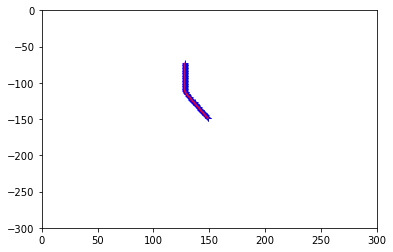

In [80]:
fig = None
if fig == None:
       fig = plt.figure()
       ax = fig.add_subplot(111)
       fig.show()
       fig.canvas.draw()
ax.clear()
ax.set_xlim([0, 300])
ax.set_ylim([-300, 0])
ax.plot(y_old, -x_old, 'b+', label='Data')
ax.plot(newY, -newX, 'r-', label='Spline, fit')
fig.canvas.draw()
fig.canvas.flush_events() 